In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('attention')
df.head()


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
df.info()

# Summary statistics
df.describe(include='all')


Shape of dataset: (60, 5)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   subject     60 non-null     int64  
 2   attention   60 non-null     object 
 3   solutions   60 non-null     int64  
 4   score       60 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


,Unnamed: 0,subject,attention,solutions,score
count,60.000000,60.000000,60,60.000000,60.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,divided,NaN,NaN
freq,NaN,NaN,30,NaN,NaN
mean,29.500000,10.500000,NaN,2.000000,5.958333
std,17.464249,5.814943,NaN,0.823387,1.621601
min,0.000000,1.000000,NaN,1.000000,2.000000
25%,14.750000,5.750000,NaN,1.000000,5.000000
50%,29.500000,10.500000,NaN,2.000000,6.000000
75%,44.250000,15.250000,NaN,3.000000,7.000000


In [3]:
# Missing values
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing Values:\n", missing)

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())



Missing Values:
             missing_count  missing_percent
Unnamed: 0              0              0.0
subject                 0              0.0
attention               0              0.0
solutions               0              0.0
score                   0              0.0

Duplicate rows: 0


In [6]:
df['attention'] = df['attention'].astype('category')
df['solutions'] = df['solutions'].astype('category')  # optional if categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  60 non-null     int64   
 1   subject     60 non-null     int64   
 2   attention   60 non-null     category
 3   solutions   60 non-null     category
 4   score       60 non-null     float64 
dtypes: category(2), float64(1), int64(2)
memory usage: 1.9 KB


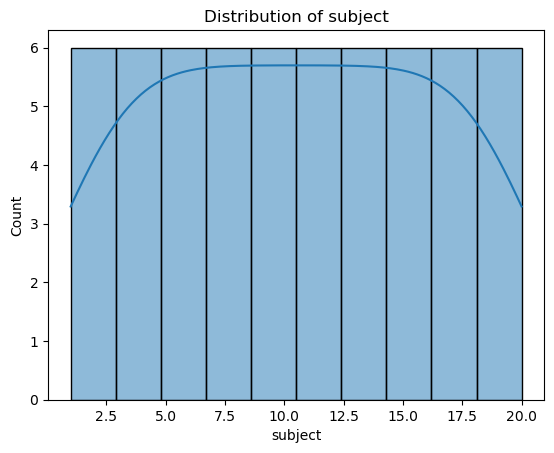

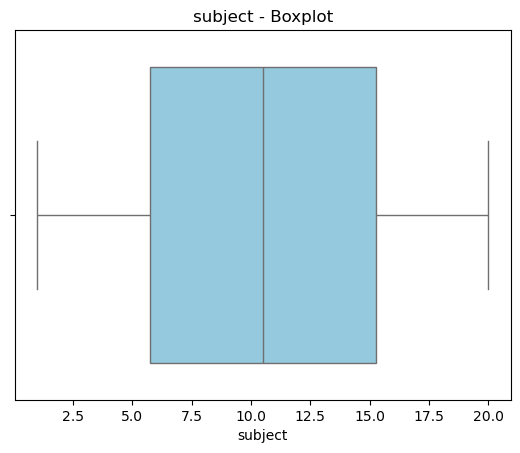

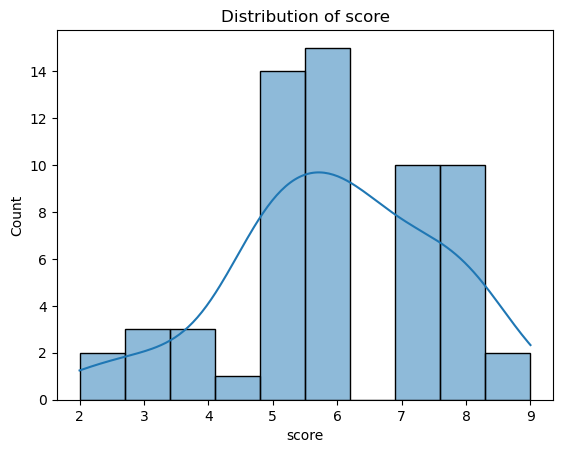

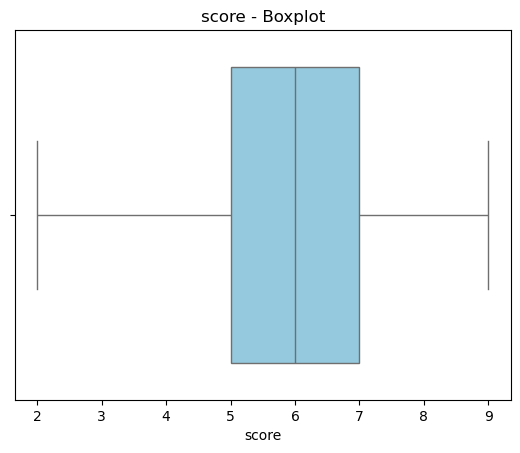

In [7]:
num_cols = ['subject', 'score']
for col in num_cols:
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} - Boxplot")
    plt.show()


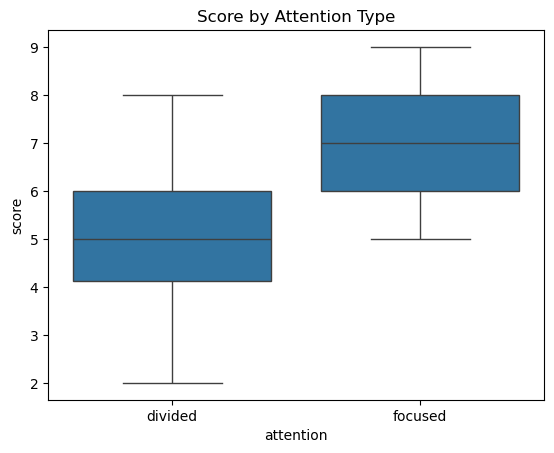

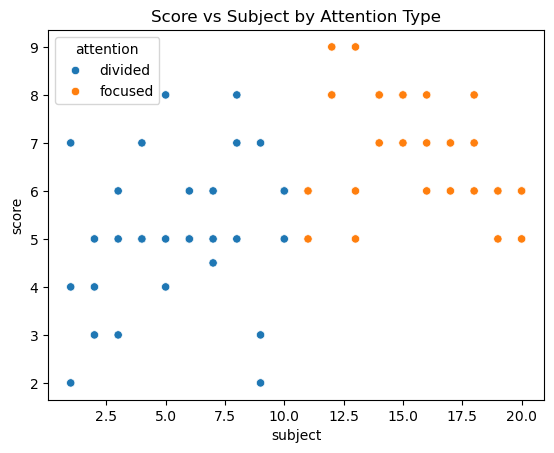

In [8]:
sns.boxplot(x='attention', y='score', data=df)
plt.title("Score by Attention Type")
plt.show()

sns.scatterplot(x='subject', y='score', hue='attention', data=df)
plt.title("Score vs Subject by Attention Type")
plt.show()

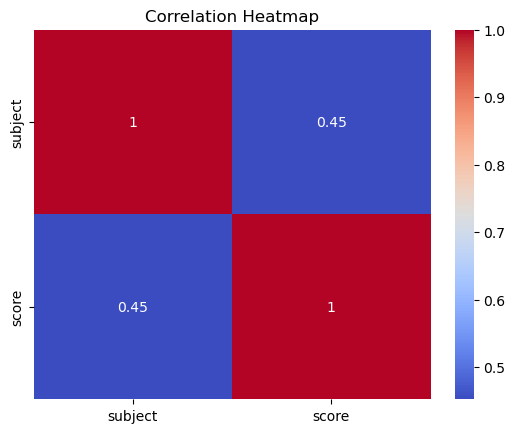

In [9]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

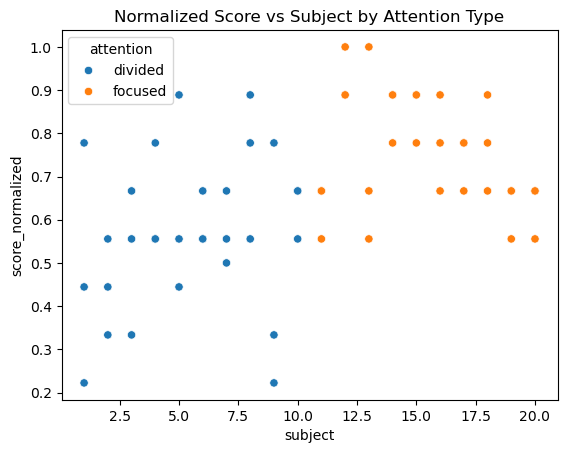

In [10]:
df['score_normalized'] = df['score'] / df['score'].max()

sns.scatterplot(x='subject', y='score_normalized', hue='attention', data=df)
plt.title("Normalized Score vs Subject by Attention Type")
plt.show()

In [11]:
df.to_csv("attention_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as attention_cleaned.csv")


✅ Cleaned dataset saved as attention_cleaned.csv
